In [1]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import scipy.signal as signal

#加载日志数据
ea=event_accumulator.EventAccumulator(r'C:\Users\john\Desktop\net\temlog\events.out.tfevents.1588509908.jupyter-251613-321279') 
ea.Reload()
print(ea.scalars.Keys())

d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

['trainloss', 'validation_loss']


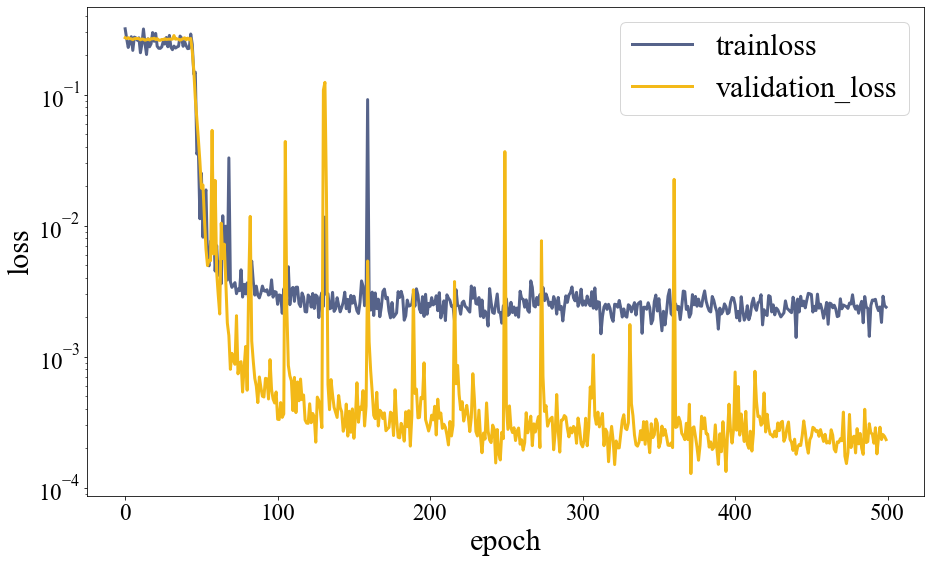

In [2]:
fig,ax = plt.subplots(figsize=(15, 9))

tr = ea.scalars.Items('trainloss')
trainloss = [j.value for j in tr]
#trainloss = trainloss[:199]
#trD = ea.scalars.Items('trainDloss')
#trainDloss = [j.value for j in trD]
va = tr = ea.scalars.Items('validation_loss')
valloss = [j.value for j in va]
#valloss = valloss[:199]
x = range(0, len(trainloss))
#设置线的属性
line1 = plt.plot(x, trainloss,color='#56638A', linestyle='-', linewidth=3)  
#line2 = plt.plot(x, trainDloss, color='#0056AC', linestyle='-', linewidth=3)
line3 = plt.plot(x, valloss, color='#F3B918', linestyle='-', linewidth=3)

plt.yscale('log') 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}
plt.xlabel('epoch',font2)
plt.ylabel('loss',font2)
#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}
plt.legend(('trainloss', 'validation_loss', ), loc='upper right' ,prop=font1)  
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#plt.title('unetdeep experiment' ,font2)  
plt.savefig('train.png')
plt.show()

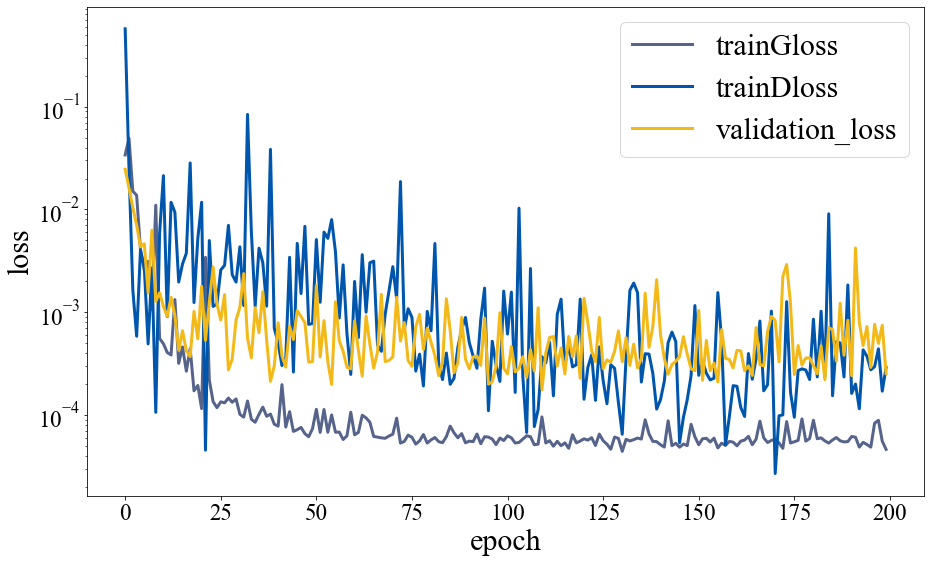

In [2]:
fig,ax = plt.subplots(figsize=(15, 9))

trG = ea.scalars.Items('trainGloss')
trainGloss = [j.value for j in trG]
trD = ea.scalars.Items('trainDloss')
trainDloss = [j.value for j in trD]
va = tr = ea.scalars.Items('validation_loss')
valloss = [j.value for j in va]


x = range(0, len(trainGloss))
#设置线的属性
line1 = plt.plot(x, trainGloss,color='#56638A', linestyle='-', linewidth=3)  
line2 = plt.plot(x, trainDloss, color='#0056AC', linestyle='-', linewidth=3)
line3 = plt.plot(x, valloss, color='#F3B918', linestyle='-', linewidth=3)

plt.yscale('log') 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}
plt.xlabel('epoch',font2)
plt.ylabel('loss',font2)
#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}
plt.legend(('trainGloss', 'trainDloss','validation_loss', ), loc='upper right' ,prop=font1)  
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#plt.title('unetdeep experiment' ,font2)  
plt.savefig('train.png')
plt.show()

In [1]:
import cv2
import os
img_path  = 'D://pix2pix/mianyang_data'

image_filenames=[img_path +'/'+x for x in os.listdir(img_path) ]
#len(image_filenames)
for idx in range(len(image_filenames)):
    img = cv2.imread(image_filenames[idx],cv2.IMREAD_GRAYSCALE) # 读取和代码处于同一目录下的 lena.pnBB
    img1 = img[0:128, 0:128]
    print(img1.shape)
    
    img2 = img[0:128, 128:256]
    print(img2.shape)
    cv2.imwrite('D://pix2pix/Dataset_gratuation/dataset_mianyang/Train/labels/' + str(idx).zfill(6) + '.png', img1)
    cv2.imwrite('D://pix2pix/Dataset_gratuation/dataset_mianyang/Train/inputs/' + str(idx).zfill(6) + '.png', img2)

NameError: name 'img_path' is not defined

In [26]:
import torch
import torchvision.models as models
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.optim import lr_scheduler
import torch.nn.functional as F
from PIL import Image
import glob
import os
import cv2
import numpy as np
import time

img_path  = 'D://pix2pix/mianyang_data'

image_filenames=[img_path +'/'+x for x in os.listdir(img_path) ]

img = cv2.imread(image_filenames[idx],cv2.IMREAD_GRAYSCALE) 
img1 = img[0:128, 0:128]
img1 =Image.fromarray(img1)
transforms = transforms.Compose([
            transforms.Resize((128,128)),
            transforms.Grayscale(),
            transforms.ToTensor(),    
        ])
a = transforms(img1)
print(a.shape)

torch.Size([1, 128, 128])


In [7]:
import cv2
import os
import numpy as np

img_path1  = 'D://pix2pix/Dataset_gratuation/dataset_mianyang/Test/labels'
img_path2  = 'D://pix2pix/Dataset_gratuation/dataset_mianyang/Test/inputs'
image_filenames1=[img_path1 +'/'+x for x in os.listdir(img_path1) ]
image_filenames2=[img_path2 +'/'+x for x in os.listdir(img_path2) ]
#len(image_filenames)
for idx in range(len(image_filenames1)):
    img1 = cv2.imread(image_filenames1[idx],cv2.IMREAD_GRAYSCALE) # 读取和代码处于同一目录下的
    img2 = cv2.imread(image_filenames2[idx],cv2.IMREAD_GRAYSCALE)
    
    result=np.zeros([128, 128*2])
    result[:, :128] = img1
    result[:, 128:] = img2
    
    cv2.imwrite('D://pix2pix/Dataset_gratuation/dataset_mianyang/Test/' + str(idx).zfill(6) + '.png', result)
   

In [22]:
import cv2
import os
import numpy as np

for idx in range(180):
    
    img1 = cv2.imread('D://pix2pix/1214 my/images' +'/'+str(idx+1).zfill(6)+'-targets'+ '.png',cv2.IMREAD_GRAYSCALE) # 读取和代码处于同一目录下的
    img2 = cv2.imread('D://pix2pix/1214 my/images' +'/'+str(idx+1).zfill(6)+'-inputs'+ '.png',cv2.IMREAD_GRAYSCALE) 
    
    result=np.zeros([128, 128*2])
    result[:, :128] = img1
    result[:, 128:] = img2
    
    cv2.imwrite('D://pix2pix/Dataset_gratuation/dataset_mianyang/Test/' + str(idx+1).zfill(6) + '.png', result)
   

In [ ]:
from PIL import Image
import os, sys

for idx in range(180):
    
    im = Image.new("RGB", (512, 128))
    img1 = Image.open('D://pix2pix/1214 my/images' +'/'+str(idx+1).zfill(6)+'-targets'+ '.png') 
    img2 = Image.open('D://pix2pix/1214 my/images' +'/'+str(idx+1).zfill(6)+'-inputs'+ '.png') 
    im.paste(img1, (0,0))
    im.paste(img1, (128,0))
    
    im.save('D://pix2pix/Dataset_gratuation/dataset_mianyang/Test/' + str(idx+1).zfill(6) + '.png')

In [ ]:
from PIL import Image
import os, sys

for idx in range(180):
    
    im = Image.new("RGB", (512, 128))
    img1 = Image.open('D://pix2pix/1214 my/images' +'/'+str(idx+1).zfill(6)+'-targets'+ '.png') 
    img2 = Image.open('D://pix2pix/1214 my/images' +'/'+str(idx+1).zfill(6)+'-inputs'+ '.png') 
    im.paste(img1, (0,0))
    im.paste(img1, (128,0))
    
    im.save('D://pix2pix/Dataset_gratuation/dataset_mianyang/Test/' + str(idx+1).zfill(6) + '.png')

In [ ]:
import tensorflow as tf
import cv2
img_path  = '/home/aistudio/data/data24832/Dataset_gratuation/dataset_simulation/Test/inputs'
image_filenames=[img_path +'/'+x for x in os.listdir(img_path) ]

for img in image_filenames:
    merger = cv2.imread(img)
    
tf.image.decode_image

def psnr(tf_img1, tf_img2):
    return tf.image.psnr(tf_img1, tf_img2, max_val=255)
 
def _main():
    t1 = read_img('t1.jpg')
    t2 = read_img('t2.jpg')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        y = sess.run(psnr(t1, t2))
        print(y)
 
 
if __name__ == '__main__':
    _main()
